# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

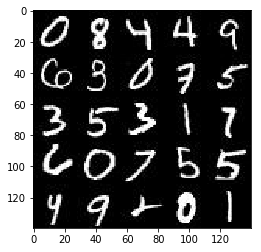

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

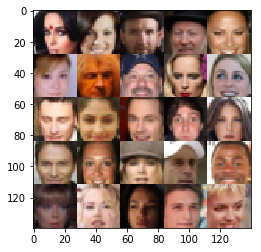

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
disc_selected=False
gen_selected=False
discrim=4
gener=5

In [7]:
def leaky_relu(data, alpha=0.2):
     return tf.maximum(alpha*data, data)

In [8]:
def disc_conv32(inputs, filters, kernel_size=5, strides=2, padding='same', is_training=True):
    x = tf.layers.conv2d(inputs, filters, kernel_size, strides=strides, padding=padding)
    x = tf.layers.batch_normalization(x, training=is_training)
    return leaky_relu(x)

# Implementation 1
if not disc_selected and discrim==1:
    disc_selected=True
    def discriminator(images, reuse=False, training=True):
        print('discriminator implementation: 1')
        """
        Create the discriminator network
        :param images: Tensor of input image(s)
        :param reuse: Boolean if the weights should be reused
        :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
        """
        # TODO: Implement Function
        with tf.variable_scope('discriminator', reuse=reuse):
            # Input layer is 28x28x3
            x = tf.layers.conv2d(images, 128, 4, strides=2, padding='same')
            x = leaky_relu(x)
            # 14x14x128

            x = disc_conv32(x, 256, kernel_size=4, is_training=training)
            # 7x7x256

            x = disc_conv32(x, 512, kernel_size=4, is_training=training)
            # 4x4x512

            x = disc_conv32(x, 1024, kernel_size=4, is_training=training)
            # 2x2x1024

            # Flatten
            flat = tf.reshape(x, (-1, 2*2*1024))
            logits = tf.layers.dense(flat, 1)
            out = tf.sigmoid(logits)

            return out, logits


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_discriminator(discriminator, tf)

In [9]:
# Implementation 2
if not disc_selected and discrim==2:
    disc_selected=True
    def discriminator(images, reuse=False, training=True):
        print('discriminator implementation: 2')
        """
        Create the discriminator network
        :param images: Tensor of input image(s)
        :param reuse: Boolean if the weights should be reused
        :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
        """
        # TODO: Implement Function
        with tf.variable_scope('discriminator', reuse=reuse):
            # Input layer is 28x28x3
            x = tf.layers.conv2d(images, 128, 4, strides=2, padding='same')
            x = leaky_relu(x)
            # 14x14x128

            x = disc_conv32(x, 256, kernel_size=4, strides=1, is_training=training)
            x = disc_conv32(x, 256, kernel_size=4, strides=2, is_training=training)
            # 7x7x256

            x = disc_conv32(x, 512, kernel_size=4, strides=1, is_training=training)
            x = disc_conv32(x, 512, kernel_size=4, strides=2, is_training=training)
            # 4x4x512

            x = disc_conv32(x, 1024, kernel_size=4, strides=1, is_training=training)
            x = disc_conv32(x, 1024, kernel_size=4, strides=2, is_training=training)
            # 2x2x1024

            # Flatten
            flat = tf.reshape(x, (-1, 2*2*1024))
            logits = tf.layers.dense(flat, 1)
            out = tf.sigmoid(logits)

            return out, logits


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_discriminator(discriminator, tf)

In [10]:
if not disc_selected and discrim==3:
    disc_selected=True
    # Implementation 3
    def discriminator(images, reuse=False, training=True, keep_prob=0.5):
        print('discriminator implementation: 3')
        """
        Create the discriminator network
        :param images: Tensor of input image(s)
        :param reuse: Boolean if the weights should be reused
        :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
        """
        # TODO: Implement Function
        with tf.variable_scope('discriminator', reuse=reuse):
            # Input layer is 28x28x3
            x = tf.layers.conv2d(images, 128, 4, strides=2, padding='same')
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=training)
            # 14x14x128

            x = disc_conv32(x, 256, kernel_size=4, strides=1, is_training=training)
            x = disc_conv32(x, 256, kernel_size=4, strides=2, is_training=training)
            x = tf.layers.dropout(x, keep_prob, training=training)
            # 7x7x256

            x = disc_conv32(x, 512, kernel_size=4, strides=1, is_training=training)
            x = disc_conv32(x, 512, kernel_size=4, strides=2, is_training=training)
            x = tf.layers.dropout(x, keep_prob, training=training)
            # 4x4x512

            x = disc_conv32(x, 1024, kernel_size=4, strides=1, is_training=training)
            x = disc_conv32(x, 1024, kernel_size=4, strides=2, is_training=training)
            x = tf.layers.dropout(x, keep_prob, training=training)
            # 2x2x1024

            # Flatten
            flat = tf.reshape(x, (-1, 2*2*1024))
            logits = tf.layers.dense(flat, 1)
            out = tf.sigmoid(logits)

            return out, logits


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_discriminator(discriminator, tf)

In [11]:
if not disc_selected or discrim==4:
    disc_selected=True
    # Implementation 4
    def discriminator(images, reuse=False, keep_prob=0.5):
        print('discriminator implementation: 4')
        """
        Create the discriminator network
        :param images: Tensor of input image(s)
        :param reuse: Boolean if the weights should be reused
        :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
        """
        # TODO: Implement Function
        with tf.variable_scope('discriminator', reuse=reuse):
            # Input layer is 28x28xn
            # Convolutional layer, 14x14x64
            x = tf.layers.conv2d(images, 64, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob)

            # Strided convolutional layer, 7x7x128
            x = tf.layers.conv2d(x, 128, 5, 2, 'same', use_bias=False)
            x = tf.layers.batch_normalization(x)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob)

            # Strided convolutional layer, 4x4x256
            x = tf.layers.conv2d(x, 256, 5, 2, 'same', use_bias=False)
            x = tf.layers.batch_normalization(x)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob)

            # fully connected
            flat = tf.reshape(x, (-1, 4*4*256))
            logits = tf.layers.dense(flat, 1)
            out = tf.sigmoid(logits)

            return out, logits


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_discriminator(discriminator, tf)

discriminator implementation: 4
discriminator implementation: 4
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [12]:
def gen_conv2d(inputs, filters, kernel_size=5, strides=2, padding='same', is_training=False):
    x = tf.layers.conv2d_transpose(inputs, filters, kernel_size, strides=strides, padding=padding)
    x = tf.layers.batch_normalization(x, training=is_training)
    return leaky_relu(x)

# Implementation 1
if not gen_selected and gener==1:
    gen_selected=True
    def generator(z, out_channel_dim, is_train=True):
        print('generator implementation: 1')
        """
        Create the generator network
        :param z: Input z
        :param out_channel_dim: The number of channels in the output image
        :param is_train: Boolean if generator is being used for training
        :return: The tensor output of the generator
        """
        # TODO: Implement Fu
        reuse = not is_train
        with tf.variable_scope('generator', reuse=reuse):
            # First fully connected layer
            x = tf.layers.dense(z, 7*7*1024)
            # Reshape it to start the convolutional stack
            x = tf.reshape(x, (-1, 7, 7, 1024))
            x = gen_conv2d(x, 1024, kernel_size=4, strides=1, is_training=is_train)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            # 7x7x1024

            x = gen_conv2d(x, 512, kernel_size=4, strides=2, is_training=is_train)
            # 14x14x512

            x = gen_conv2d(x, 256, kernel_size=4, strides=2, is_training=is_train,)
            # 28x28x256

            x = gen_conv2d(x, 128, kernel_size=4, strides=1, is_training=is_train)
            # 28x28x128

            logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, padding='same')
            # 28,28,5

            out = tf.tanh(logits)

            return out


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_generator(generator, tf)

In [13]:
if not gen_selected and gener==2:
    gen_selected=True
    # Implementation 2
    def generator(z, out_channel_dim, is_train=True):
        print('generator implementation: 2')
        """
        Create the generator network
        :param z: Input z
        :param out_channel_dim: The number of channels in the output image
        :param is_train: Boolean if generator is being used for training
        :return: The tensor output of the generator
        """
        # TODO: Implement Fu
        with tf.variable_scope('generator', reuse=(not is_train)):
            # First fully connected layer
            x = tf.layers.dense(z, 7*7*1024)
            # Reshape it to start the convolutional stack
            x = tf.reshape(x, (-1, 7, 7, 1024))
            x = gen_conv2d(x, 1024, kernel_size=4, strides=1, is_training=is_train)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            # 7x7x1024

            x = gen_conv2d(x, 512, kernel_size=2, strides=1, is_training=is_train)
            x = gen_conv2d(x, 512, kernel_size=4, strides=2, is_training=is_train)
            # 14x14x512

            x = gen_conv2d(x, 256, kernel_size=2, strides=1, is_training=is_train)
            x = gen_conv2d(x, 256, kernel_size=4, strides=2, is_training=is_train)
            # 28x28x256

            x = gen_conv2d(x, 128, kernel_size=2, strides=1, is_training=is_train)
            x = gen_conv2d(x, 128, kernel_size=4, strides=1, is_training=is_train)
            # 28x28x128

            logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, padding='same')
            # 28,28,5

            out = tf.tanh(logits)

            return out


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_generator(generator, tf)

In [14]:
if not gen_selected and gener==3:
    gen_selected=True
    # Implementation 3
    def generator(z, out_channel_dim, is_train=True, keep_prob=0.5):
        print('generator implementation: 3')
        """
        Create the generator network
        :param z: Input z
        :param out_channel_dim: The number of channels in the output image
        :param is_train: Boolean if generator is being used for training
        :return: The tensor output of the generator
        """
        # TODO: Implement Function
        with tf.variable_scope('generator', reuse=(not is_train)):
            x = tf.layers.dense(z, 4*4*1024, use_bias=False)
            x = tf.reshape(x, (-1, 4, 4, 1024))
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 4x4x1024

            x = tf.layers.conv2d_transpose(x, 512, 4, 1, 'valid', use_bias=False)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 7x7x512

            x = tf.layers.conv2d_transpose(x, 256, 5, 2, 'same', use_bias=False)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 14x14x256

            x = tf.layers.conv2d_transpose(x, 128, 5, 2, 'same', use_bias=False)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 28x28x128

            logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, 1, 'same')
            # 28x28x5

            out = tf.tanh(logits)

            return out


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_generator(generator, tf)

In [15]:
if not gen_selected and gener==4:
    gen_selected=True
    # Implementation 4
    def generator(z, out_channel_dim, is_train=True, keep_prob=0.5):
        print('generator implementation: 4')
        """
        Create the generator network
        :param z: Input z
        :param out_channel_dim: The number of channels in the output image
        :param is_train: Boolean if generator is being used for training
        :return: The tensor output of the generator
        """
        # TODO: Implement Fu
        reuse = not is_train
        with tf.variable_scope('generator', reuse=reuse):
            # First fully connected layer
            x = tf.layers.dense(z, 7*7*1024)
            # Reshape it to start the convolutional stack
            x = tf.reshape(x, (-1, 7, 7, 1024))
            x = gen_conv2d(x, 1024, kernel_size=4, strides=1, is_training=is_train)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 7x7x1024

            x = gen_conv2d(x, 512, kernel_size=4, strides=2, is_training=is_train)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 14x14x512

            x = gen_conv2d(x, 256, kernel_size=4, strides=2, is_training=is_train)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 28x28x256

            x = gen_conv2d(x, 128, kernel_size=4, strides=1, is_training=is_train)
            x = tf.layers.dropout(x, keep_prob, training=is_train)
            # 28x28x128

            logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, padding='same')
            # 28,28,5

            out = tf.tanh(logits)

            return out


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_generator(generator, tf)

In [16]:
if not gen_selected or gener==5:
    gen_selected=True
    # Implementation 5
    def generator(z, out_channel_dim, is_train=True, alpha=0.2, keep_prob=0.5):
        print('generator implementation: 5')
        """
        Create the generator network
        :param z: Input z
        :param out_channel_dim: The number of channels in the output image
        :param is_train: Boolean if generator is being used for training
        :return: The tensor output of the generator
        """
        # TODO: Implement Function
        with tf.variable_scope('generator', reuse=(not is_train)):
            # First fully connected layer, 4x4x1024
            x = tf.layers.dense(z, 4*4*1024, use_bias=False)
            x = tf.reshape(x, (-1, 4, 4, 1024))
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)

            # Deconvolution, 7x7x512
            x = tf.layers.conv2d_transpose(x, 512, 4, 1, 'valid', use_bias=False)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)

            # Deconvolution, 14x14x256
            x = tf.layers.conv2d_transpose(x, 256, 5, 2, 'same', use_bias=False)
            x = tf.layers.batch_normalization(x, training=is_train)
            x = leaky_relu(x)
            x = tf.layers.dropout(x, keep_prob, training=is_train)

            # Output layer, 28x28xn
            logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, 2, 'same')

            out = tf.tanh(logits)

            return out


    """
    DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
    """
    tests.test_generator(generator, tf)

generator implementation: 5
generator implementation: 5
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim, smooth_factor=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * (1 - smooth_factor)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

generator implementation: 5
discriminator implementation: 4
discriminator implementation: 4
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0
    print_every=20
    show_every=100
    (num_images, image_width, image_height, image_channels) = data_shape
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch in get_batches(batch_size):
                steps += 1
                batch *= 2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
        show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
    return losses, samples

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

generator implementation: 5
discriminator implementation: 4
discriminator implementation: 4
Epoch 1/2... Discriminator Loss: 1.2582... Generator Loss: 0.7517
Epoch 1/2... Discriminator Loss: 0.6811... Generator Loss: 1.7929
Epoch 1/2... Discriminator Loss: 0.9988... Generator Loss: 1.1932
Epoch 1/2... Discriminator Loss: 0.6685... Generator Loss: 1.5241
Epoch 1/2... Discriminator Loss: 1.2339... Generator Loss: 1.0820
generator implementation: 5


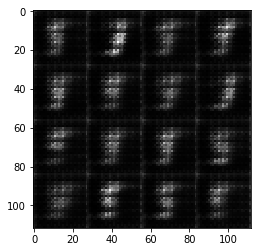

Epoch 1/2... Discriminator Loss: 1.1820... Generator Loss: 1.0062
Epoch 1/2... Discriminator Loss: 1.1187... Generator Loss: 1.1656
Epoch 1/2... Discriminator Loss: 1.4179... Generator Loss: 0.9386
Epoch 1/2... Discriminator Loss: 1.1999... Generator Loss: 0.9936
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 1.0548
generator implementation: 5


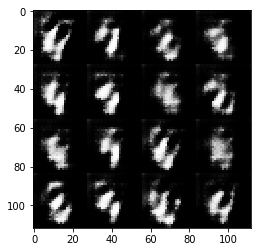

Epoch 1/2... Discriminator Loss: 1.1137... Generator Loss: 1.1167
Epoch 1/2... Discriminator Loss: 1.0121... Generator Loss: 1.1736
Epoch 1/2... Discriminator Loss: 1.2754... Generator Loss: 0.9754
Epoch 1/2... Discriminator Loss: 1.2581... Generator Loss: 1.1648
Epoch 1/2... Discriminator Loss: 1.2813... Generator Loss: 1.0405
generator implementation: 5


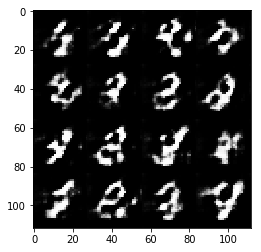

Epoch 1/2... Discriminator Loss: 1.0600... Generator Loss: 1.3357
Epoch 1/2... Discriminator Loss: 1.3017... Generator Loss: 0.8974
Epoch 1/2... Discriminator Loss: 1.2614... Generator Loss: 0.9021
Epoch 1/2... Discriminator Loss: 1.3366... Generator Loss: 0.8758
Epoch 1/2... Discriminator Loss: 1.2844... Generator Loss: 0.8410
generator implementation: 5


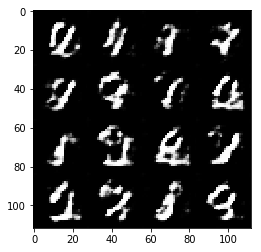

Epoch 1/2... Discriminator Loss: 1.1326... Generator Loss: 1.2278
Epoch 1/2... Discriminator Loss: 1.1832... Generator Loss: 1.1299
Epoch 1/2... Discriminator Loss: 1.3535... Generator Loss: 0.9909
Epoch 1/2... Discriminator Loss: 1.3335... Generator Loss: 0.8284
Epoch 1/2... Discriminator Loss: 1.2820... Generator Loss: 1.2387
generator implementation: 5


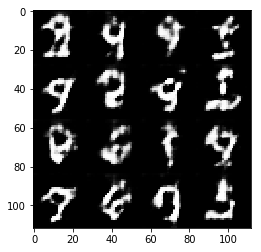

Epoch 1/2... Discriminator Loss: 1.1366... Generator Loss: 0.9491
Epoch 1/2... Discriminator Loss: 1.5700... Generator Loss: 0.4906
Epoch 1/2... Discriminator Loss: 1.1491... Generator Loss: 1.0895
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.3006
Epoch 1/2... Discriminator Loss: 1.1617... Generator Loss: 0.9947
generator implementation: 5


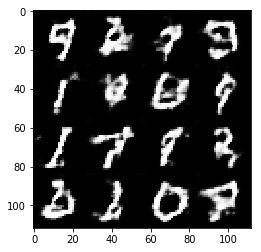

Epoch 1/2... Discriminator Loss: 1.1530... Generator Loss: 1.1918
Epoch 1/2... Discriminator Loss: 1.2578... Generator Loss: 0.9693
Epoch 1/2... Discriminator Loss: 1.1500... Generator Loss: 1.0876
Epoch 1/2... Discriminator Loss: 1.4534... Generator Loss: 0.8358
Epoch 1/2... Discriminator Loss: 1.3012... Generator Loss: 0.7552
generator implementation: 5


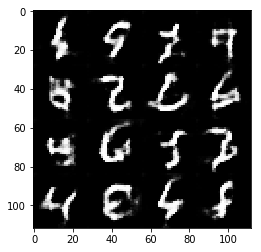

Epoch 1/2... Discriminator Loss: 1.1922... Generator Loss: 0.9294
Epoch 1/2... Discriminator Loss: 1.3162... Generator Loss: 0.6760
Epoch 1/2... Discriminator Loss: 1.2362... Generator Loss: 0.9834
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 0.9406
Epoch 1/2... Discriminator Loss: 1.2162... Generator Loss: 1.1583
generator implementation: 5


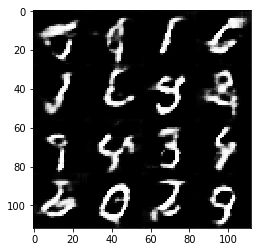

Epoch 1/2... Discriminator Loss: 1.1647... Generator Loss: 1.1028
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 1.0712
Epoch 1/2... Discriminator Loss: 1.2419... Generator Loss: 0.7817
Epoch 1/2... Discriminator Loss: 1.3037... Generator Loss: 1.0330
Epoch 1/2... Discriminator Loss: 1.2248... Generator Loss: 0.9880
generator implementation: 5


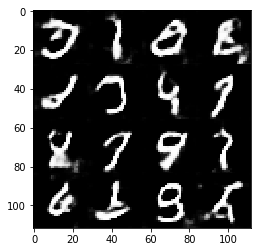

Epoch 1/2... Discriminator Loss: 1.2358... Generator Loss: 1.1421
Epoch 2/2... Discriminator Loss: 1.2452... Generator Loss: 0.8355
Epoch 2/2... Discriminator Loss: 1.1126... Generator Loss: 0.9831
Epoch 2/2... Discriminator Loss: 1.1486... Generator Loss: 0.9579
Epoch 2/2... Discriminator Loss: 1.2794... Generator Loss: 0.8393
generator implementation: 5


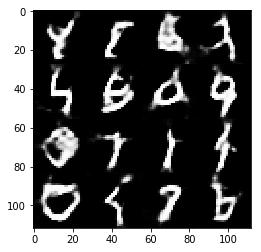

Epoch 2/2... Discriminator Loss: 1.1881... Generator Loss: 1.2795
Epoch 2/2... Discriminator Loss: 1.1681... Generator Loss: 0.9199
Epoch 2/2... Discriminator Loss: 1.2738... Generator Loss: 0.6453
Epoch 2/2... Discriminator Loss: 1.2037... Generator Loss: 0.8797
Epoch 2/2... Discriminator Loss: 1.2032... Generator Loss: 1.2027
generator implementation: 5


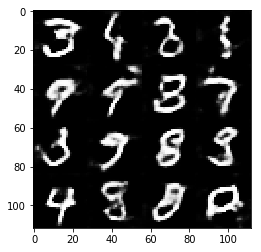

Epoch 2/2... Discriminator Loss: 1.2416... Generator Loss: 0.8981
Epoch 2/2... Discriminator Loss: 1.2282... Generator Loss: 0.8980
Epoch 2/2... Discriminator Loss: 1.0989... Generator Loss: 0.9325
Epoch 2/2... Discriminator Loss: 1.1871... Generator Loss: 0.8228
Epoch 2/2... Discriminator Loss: 1.1377... Generator Loss: 1.0524
generator implementation: 5


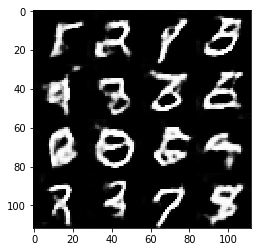

Epoch 2/2... Discriminator Loss: 1.1002... Generator Loss: 1.1449
Epoch 2/2... Discriminator Loss: 1.1363... Generator Loss: 0.9302
Epoch 2/2... Discriminator Loss: 1.2287... Generator Loss: 1.3398
Epoch 2/2... Discriminator Loss: 1.1382... Generator Loss: 0.9244
Epoch 2/2... Discriminator Loss: 1.1309... Generator Loss: 1.1291
generator implementation: 5


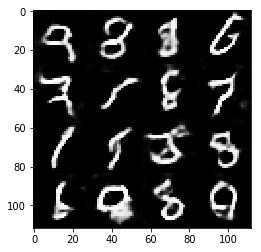

Epoch 2/2... Discriminator Loss: 1.0542... Generator Loss: 1.3313
Epoch 2/2... Discriminator Loss: 1.0808... Generator Loss: 1.1581
Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 0.9581
Epoch 2/2... Discriminator Loss: 1.0177... Generator Loss: 1.2509
Epoch 2/2... Discriminator Loss: 1.1867... Generator Loss: 1.4659
generator implementation: 5


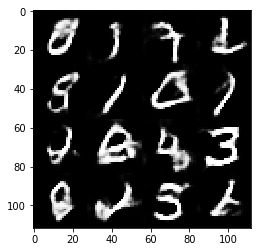

Epoch 2/2... Discriminator Loss: 1.1716... Generator Loss: 1.3503
Epoch 2/2... Discriminator Loss: 1.2100... Generator Loss: 1.5134
Epoch 2/2... Discriminator Loss: 0.9991... Generator Loss: 1.4285
Epoch 2/2... Discriminator Loss: 1.1211... Generator Loss: 1.1423
Epoch 2/2... Discriminator Loss: 1.1033... Generator Loss: 1.2692
generator implementation: 5


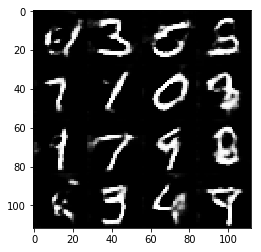

Epoch 2/2... Discriminator Loss: 1.0915... Generator Loss: 1.0674
Epoch 2/2... Discriminator Loss: 1.0279... Generator Loss: 1.0529
Epoch 2/2... Discriminator Loss: 1.1669... Generator Loss: 0.6987
Epoch 2/2... Discriminator Loss: 1.0683... Generator Loss: 1.4199
Epoch 2/2... Discriminator Loss: 1.0372... Generator Loss: 1.4434
generator implementation: 5


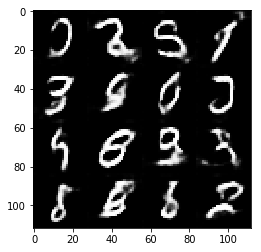

Epoch 2/2... Discriminator Loss: 1.0881... Generator Loss: 1.5617
Epoch 2/2... Discriminator Loss: 1.3153... Generator Loss: 1.9677
Epoch 2/2... Discriminator Loss: 1.1073... Generator Loss: 0.8726
Epoch 2/2... Discriminator Loss: 1.0046... Generator Loss: 1.2777
Epoch 2/2... Discriminator Loss: 0.9902... Generator Loss: 1.1196
generator implementation: 5


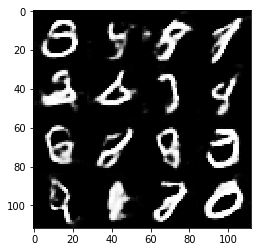

Epoch 2/2... Discriminator Loss: 1.1222... Generator Loss: 1.4739
Epoch 2/2... Discriminator Loss: 1.2159... Generator Loss: 0.6290
Epoch 2/2... Discriminator Loss: 1.0453... Generator Loss: 0.9919
Epoch 2/2... Discriminator Loss: 1.2213... Generator Loss: 0.7579
Epoch 2/2... Discriminator Loss: 1.1589... Generator Loss: 1.7936
generator implementation: 5


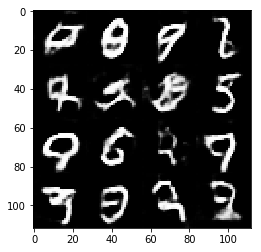

Epoch 2/2... Discriminator Loss: 1.0372... Generator Loss: 0.9044
Epoch 2/2... Discriminator Loss: 1.0540... Generator Loss: 0.9600
Epoch 2/2... Discriminator Loss: 1.0817... Generator Loss: 0.8927
generator implementation: 5


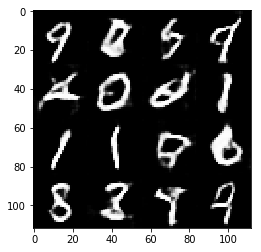

CPU times: user 1min 27s, sys: 1min 23s, total: 2min 50s
Wall time: 3min 38s


In [21]:
%%time

batch_size = 64
z_dim = 100
learning_rate = 0.00025
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

generator implementation: 5
discriminator implementation: 4
discriminator implementation: 4
Epoch 1/1... Discriminator Loss: 0.7673... Generator Loss: 2.4027
Epoch 1/1... Discriminator Loss: 0.9526... Generator Loss: 1.1883
Epoch 1/1... Discriminator Loss: 0.7675... Generator Loss: 1.9627
Epoch 1/1... Discriminator Loss: 0.9304... Generator Loss: 1.4327
Epoch 1/1... Discriminator Loss: 1.0119... Generator Loss: 1.6519
generator implementation: 5


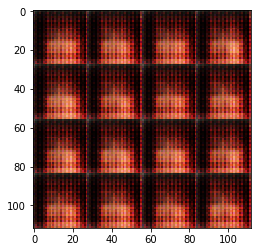

Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.9115
Epoch 1/1... Discriminator Loss: 0.7008... Generator Loss: 1.9783
Epoch 1/1... Discriminator Loss: 0.6598... Generator Loss: 2.0087
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 1.4037
Epoch 1/1... Discriminator Loss: 0.9301... Generator Loss: 1.5974
generator implementation: 5


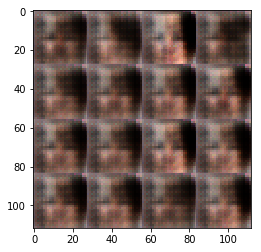

Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.9186
Epoch 1/1... Discriminator Loss: 1.0776... Generator Loss: 1.0778
Epoch 1/1... Discriminator Loss: 1.0091... Generator Loss: 1.2356
Epoch 1/1... Discriminator Loss: 1.0768... Generator Loss: 1.4145
Epoch 1/1... Discriminator Loss: 1.1135... Generator Loss: 1.0376
generator implementation: 5


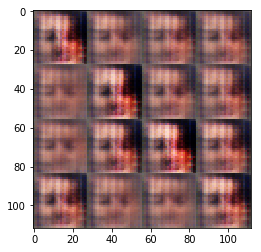

Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 0.9353
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 1.3429
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 1.1683
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 1.3709
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 1.1117
generator implementation: 5


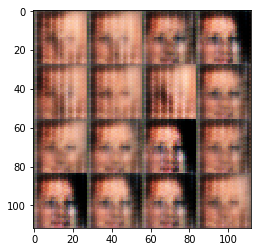

Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 1.0719
Epoch 1/1... Discriminator Loss: 1.0611... Generator Loss: 1.3286
Epoch 1/1... Discriminator Loss: 1.5000... Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.1129... Generator Loss: 1.0054
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 1.2307
generator implementation: 5


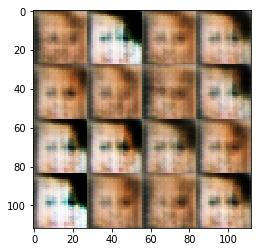

Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 0.8995
Epoch 1/1... Discriminator Loss: 1.0293... Generator Loss: 1.1112
Epoch 1/1... Discriminator Loss: 1.0672... Generator Loss: 1.2752
Epoch 1/1... Discriminator Loss: 1.0970... Generator Loss: 1.2144
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.9683
generator implementation: 5


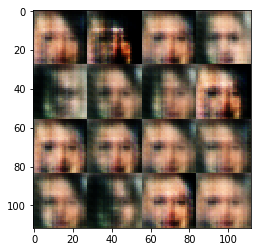

Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.9181
Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.9503
Epoch 1/1... Discriminator Loss: 1.1343... Generator Loss: 0.9776
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 1.3324
Epoch 1/1... Discriminator Loss: 1.2706... Generator Loss: 0.9173
generator implementation: 5


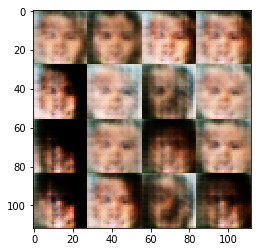

Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 1.1093
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.9441
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 1.0023
Epoch 1/1... Discriminator Loss: 1.1809... Generator Loss: 1.0086
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 1.0576
generator implementation: 5


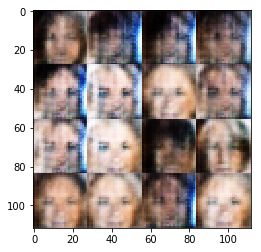

Epoch 1/1... Discriminator Loss: 1.1255... Generator Loss: 0.9483
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 1.1019
Epoch 1/1... Discriminator Loss: 1.2179... Generator Loss: 0.9070
Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 0.9522
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.9106
generator implementation: 5


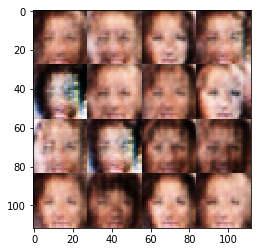

Epoch 1/1... Discriminator Loss: 1.3340... Generator Loss: 0.9118
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 0.9004
Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 0.8291
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.8982
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.8177
generator implementation: 5


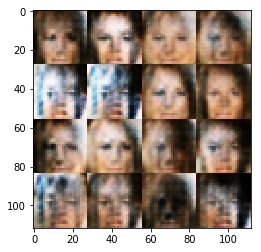

Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.9366
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.8179
Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 0.9243
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.8555
generator implementation: 5


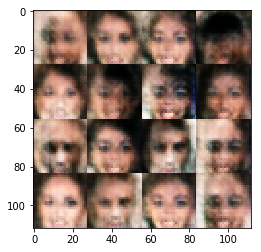

Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.8648
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.8706
generator implementation: 5


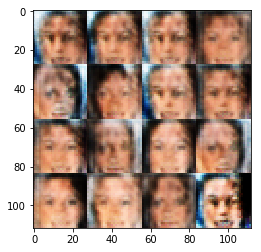

Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 1.0075
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.9956
Epoch 1/1... Discriminator Loss: 1.4055... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.7646
generator implementation: 5


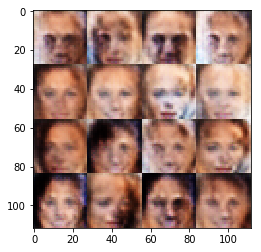

Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 1.2796... Generator Loss: 0.8489
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.8658
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.9949
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.8654
generator implementation: 5


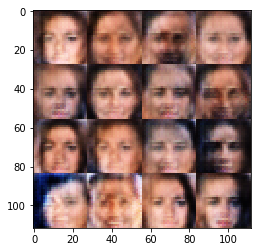

Epoch 1/1... Discriminator Loss: 1.1622... Generator Loss: 0.9857
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.8354
Epoch 1/1... Discriminator Loss: 1.2397... Generator Loss: 0.8269
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.8854
generator implementation: 5


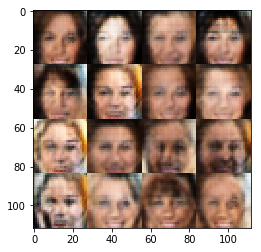

Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.8576
Epoch 1/1... Discriminator Loss: 1.2643... Generator Loss: 0.8427
generator implementation: 5


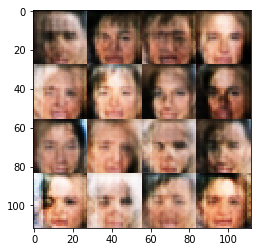

Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.2263... Generator Loss: 0.8550
generator implementation: 5


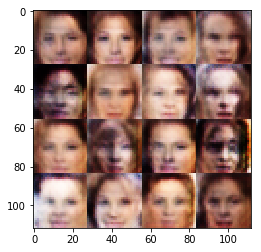

Epoch 1/1... Discriminator Loss: 1.2308... Generator Loss: 0.8806
Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 1.2244... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 1.2212... Generator Loss: 0.9242
generator implementation: 5


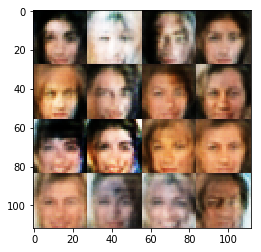

Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.2215... Generator Loss: 0.9077
Epoch 1/1... Discriminator Loss: 1.2829... Generator Loss: 0.9431
generator implementation: 5


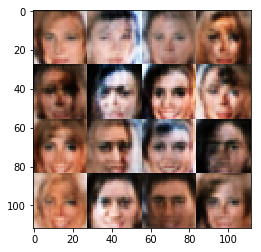

Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 1.0583
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 0.8543
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.9212
generator implementation: 5


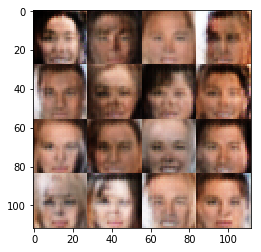

Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 0.8611
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.8748
Epoch 1/1... Discriminator Loss: 1.2651... Generator Loss: 0.8926
Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.3219... Generator Loss: 0.7171
generator implementation: 5


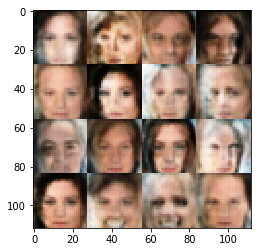

Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 1.0018
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 1.0603
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.9685
generator implementation: 5


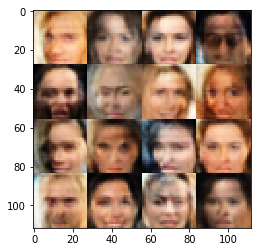

Epoch 1/1... Discriminator Loss: 1.2709... Generator Loss: 0.7135
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.9417
generator implementation: 5


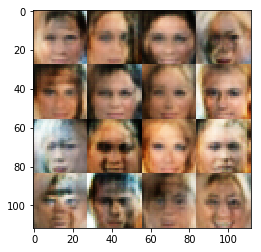

Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.8747
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.2660... Generator Loss: 0.9463
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.3401... Generator Loss: 0.8136
generator implementation: 5


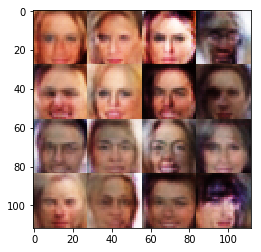

Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 1.0357
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.9652
Epoch 1/1... Discriminator Loss: 1.2668... Generator Loss: 0.8558
Epoch 1/1... Discriminator Loss: 1.2323... Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.9738
generator implementation: 5


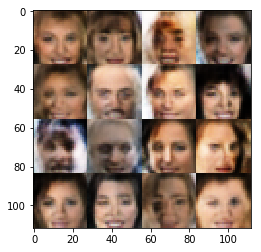

Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 1.2358
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.7569
Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 0.9683
Epoch 1/1... Discriminator Loss: 1.2845... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.8779
generator implementation: 5


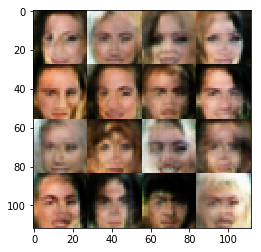

Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 0.8618
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.8734
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.9346
generator implementation: 5


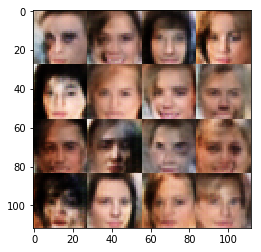

Epoch 1/1... Discriminator Loss: 1.2554... Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.9003
Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 0.9116
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 1.4095
Epoch 1/1... Discriminator Loss: 1.2670... Generator Loss: 0.8486
generator implementation: 5


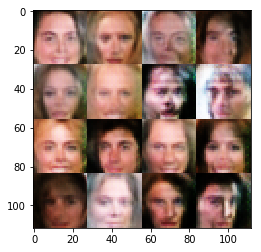

Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.8774
Epoch 1/1... Discriminator Loss: 1.2272... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.8254
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.8716
generator implementation: 5


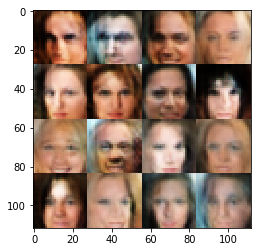

Epoch 1/1... Discriminator Loss: 1.2480... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.8677
Epoch 1/1... Discriminator Loss: 1.1356... Generator Loss: 1.0920
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.6054
generator implementation: 5


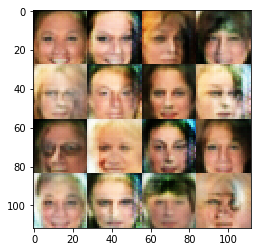

Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 0.8513
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.8945
Epoch 1/1... Discriminator Loss: 1.2690... Generator Loss: 1.0411
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 1.0587
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.9098
generator implementation: 5


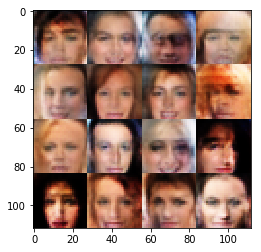

Epoch 1/1... Discriminator Loss: 1.1630... Generator Loss: 1.0216
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.9061
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.8677
generator implementation: 5


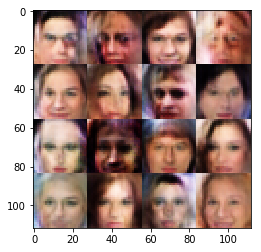

CPU times: user 3min 41s, sys: 2min 4s, total: 5min 45s
Wall time: 7min 43s


In [22]:
%%time

batch_size = 64
z_dim = 100
learning_rate = 0.00025
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

## Results

| gen impl | disc impl | alpha | batch size | z dim | learning rate | beta 1 | Number Output | Celeb Output |
|--------| ---------| -----|----------|-----|-------------|------|-------------|------------|
| 1 | 1 | 0.2 | 128 | 100 | 0.0005 | 0.5 | ![](readme/number0.jpg) | ![](readme/celeb0.jpg) |
| 1 | 1 | 0.1 | 128 | 100 | 0.0001 | 0.5 | ![](readme/number1.jpg) | ![](readme/celeb1.jpg) |
| 1 | 1 | 0.05 | 128 | 100 | 0.00005 | 0.5 | ![](readme/number2.jpg) | ![](readme/celeb2.jpg) |
| 1 | 1 | 0.05 | 128 | 100 | 0.00005 | 0.8 | ![](readme/number3.jpg) | ![](readme/celeb3.jpg) |
| 1 | 1 | 0.05 | 128 | 100 | 0.00001 | 0.8 | ![](readme/number4.jpg) | ![](readme/celeb4.jpg) |
| 1 | 1 | 0.05 | 128 | 100 | 0.00001 | 0.5 | ![](readme/number5.jpg) | ![](readme/celeb5.jpg) |
| 1 | 1 | 0.05 | 128 | 200 | 0.00005 | 0.5 | ![](readme/number6.jpg) | ![](readme/celeb6.jpg) |
| 1 | 1 | 0.05 | 128 | 400 | 0.00005 | 0.5 | ![](readme/number7.jpg) | ![](readme/celeb7.jpg) |
| 1 | 1 | 0.05 | 128 | 400 | 0.00005 | 0.9 | ![](readme/number8.jpg) | ![](readme/celeb8.jpg) |
| 1 | 1 | 0.05 | 128 | 400 | 0.00005 | 0.7 | ![](readme/number9.jpg) | ![](readme/celeb9.jpg) |
| 1 | 1 | 0.05 | 128 | 400 | 0.00005 | 0.3 | ![](readme/number10.jpg) | ![](readme/celeb10.jpg) |
| 2 | 1 | 0.05 | 128 | 400 | 0.00005 | 0.5 | ![](readme/number11.jpg) | ![](readme/celeb11.jpg) |
| 2 | 2 | 0.05 | 128 | 400 | 0.00005 | 0.5 | ![](readme/number12.jpg) | ![](readme/celeb12.jpg) |
| 2 | 2 | 0.05 | 256 | 400 | 0.0001 | 0.5 | ![](readme/number13.jpg) | ![](readme/celeb13.jpg) |
| 2 | 2 | 0.05 | 128 | 400 | 0.0001 | 0.5 | ![](readme/number14.jpg) | ![](readme/celeb14.jpg) |
| 2 | 2 | 0.05 | 128 | 400 | 0.00001 | 0.5 | ![](readme/number15.jpg) | ![](readme/celeb15.jpg) |
| 3 | 2 | 0.05 | 128 | 400 | 0.00005 | 0.5 | ![](readme/number16.jpg) | ![](readme/celeb16.jpg) |
| 3 | 2 | 0.05 | 128 | 400 | 0.0005 | 0.8 | ![](readme/number17.jpg) | ![](readme/celeb17.jpg) |
| 3 | 2 | 0.05 | 128 | 400 | 0.0005 | 0.2 | ![](readme/number18.jpg) | ![](readme/celeb18.jpg) |
| 3 | 2 | 0.05 | 128 | 400 | 0.0001 | 0.5 | ![](readme/number19.jpg) | ![](readme/celeb19.jpg) |
| 4 | 2 | 0.05 | 128 | 400 | 0.00005 | 0.5 | ![](readme/number20.jpg) | ![](readme/celeb20.jpg) |

Feels now that the discrimnator is too strong. Trying with adding dropout to the discriminator to drop the learning rate.

| gen impl | disc impl | gen drop | disc drop | alpha | batch size | z dim | learning rate | beta 1 | Number Output | Celeb Output |
|--------|---------|--------|---------|-----|----------|-----|-------------|------|-------------|------------|
| 4 | 3 | 0.5 | 0.25 | 0.05 | 128 | 400 | 0.00005 | 0.5 | ![](readme/number21.jpg) | ![](readme/celeb21.jpg) |
| 4 | 3 | 0.5 | 0.5 | 0.05 | 128 | 100 | 0.00025 | 0.5 | ![](readme/number22.jpg) | ![](readme/celeb22.jpg) |
| 4 | 3 | 0.5 | 0.5 | 0.1 | 128 | 100 | 0.0025 | 0.5 | ![](readme/number23.jpg) | ![](readme/celeb23.jpg) |
| 4 | 3 | 0.5 | 0.5 | 0.05 | 256 | 100 | 0.0005 | 0.5 | ![](readme/number24.jpg) | ![](readme/celeb24.jpg) |
| 4 | 3 | 0.5 | 0.5 | 0.05 | 64 | 100 | 0.000075 | 0.5 | ![](readme/number25.jpg) | ![](readme/celeb25.jpg) |

add smooth factor to model_loss method

| gen impl | disc impl | gen/disc drop | smooth factor | alpha | batch size | z dim | learning rate | beta 1 | Number Output | Celeb Output |
|--------|---------| -------------|--------------|-----|----------|-----|-------------|------|-------------|------------|
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 64 | 100 | 0.00025 | 0.45 | ![](readme/number26.jpg) | ![](readme/celeb26.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 128 | 100 | 0.0001 | 0.5 | ![](readme/number27.jpg) | ![](readme/celeb27.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 128 | 400 | 0.0001 | 0.5 | ![](readme/number28.jpg) | ![](readme/celeb28.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 128 | 400 | 0.00001 | 0.5 | ![](readme/number29.jpg) | ![](readme/celeb29.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 128 | 400 | 0.001 | 0.5 | ![](readme/number30.jpg) | ![](readme/celeb30.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 64 | 400 | 0.001 | 0.5 | ![](readme/number31.jpg) | ![](readme/celeb31.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.2 | 64 | 400 | 0.0001 | 0.5 | ![](readme/number32.jpg) | ![](readme/celeb32.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.1 | 0.1 | 64 | 400 | 0.0001 | 0.5 | ![](readme/number33.jpg) | ![](readme/celeb33.jpg) |
| 1 | 1 | n/a / n/a | 0.1 | 0.1 | 128 | 400 | 0.0001 | 0.5 | ![](readme/number34.jpg) | ![](readme/celeb34.jpg) |
| 1 | 1 | n/a / n/a | 0.1 | 0.1 | 64 | 400 | 0.0001 | 0.5 | ![](readme/number35.jpg) | ![](readme/celeb35.jpg) |
| 1 | 1 | n/a / n/a | 0.1 | 0.1 | 64 | 400 | 0.0001 | 0.4 | ![](readme/number36.jpg) | ![](readme/celeb36.jpg) |
| 1 | 1 | n/a / n/a | 0.1 | 0.1 | 64 | 400 | 0.0001 | 0.6 | ![](readme/number37.jpg) | ![](readme/celeb37.jpg) |
| 1 | 1 | n/a / n/a | 0.2 | 0.1 | 64 | 400 | 0.0001 | 0.6 | ![](readme/number38.jpg) | ![](readme/celeb38.jpg) |

After review testing with double batch in inner loop, changing z_dim to 100 and weight 0.0005 as a baseline. Going back to the more complex generators.

| gen impl | disc impl | gen/disc drop | smooth factor | alpha | batch size | z dim | learning rate | beta 1 | Number Output | Celeb Output |
|--------|---------|-------------|--------------|-----|----------|-----|-------------|------|-------------|------------|
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 128 | 100 | 0.0005 | 0.5 | ![](readme/number39.jpg) | ![](readme/celeb39.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 64 | 100 | 0.0005 | 0.5 | ![](readme/number40.jpg) | ![](readme/celeb40.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 64 | 100 | 0.00075 | 0.5 | ![](readme/number41.jpg) | ![](readme/celeb41.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 64 | 100 | 0.00025 | 0.5 | ![](readme/number42.jpg) | ![](readme/celeb42.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 64 | 100 | 0.0005 | 0.35 | ![](readme/number43.jpg) | ![](readme/celeb43.jpg) |
| 4 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 64 | 100 | 0.0005 | 0.5 | ![](readme/number44.jpg) | ![](readme/celeb44.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 64 | 100 | 0.0005 | 0.2 | ![](readme/number45.jpg) | ![](readme/celeb45.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.2 | 0.1 | 32 | 100 | 0.0005 | 0.45 | ![](readme/number46.jpg) | ![](readme/celeb46.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.1 | 0.1 | 64 | 100 | 0.0005 | 0.45 | ![](readme/number47.jpg) | ![](readme/celeb47.jpg) |
| 3 | 3 | 0.5 / 0.5 | 0.3 | 0.1 | 64 | 100 | 0.0005 | 0.45 | ![](readme/number48.jpg) | ![](readme/celeb48.jpg) |

Try another architecture found from suggestions on the interweb.

| gen impl | disc impl | gen/disc drop | smooth factor | alpha | batch size | z dim | learning rate | beta 1 | Number Output | Celeb Output |
|--------|---------|-------------|--------------|-----|----------|-----|-------------|------|-------------|------------|
| 5 | 4 | 0.5 / 0.5 | 0.1 | 0.2 | 64 | 100 | 0.00025 | 0.45 | ![](readme/number49.jpg) | ![](readme/celeb49.jpg) |


### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.